In [130]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline



In [131]:
#Loading the dateset
df=pd.read_csv('customer_shopping_data.csv')

In [132]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [133]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [134]:
#checking total number of rows and columns  
print(f"Total number of Rows are {df.shape[0]} and columns are {df.shape[1]}")

Total number of Rows are 99457 and columns are 10


In [135]:
df.info()
#we can observe that no null values are present in data set
#invoice_date column needs to be converted to date format 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [136]:
df.describe(include='all')
#we can observe outliers in price column 

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457.000000,99457,99457.000000,99457.000000,99457,99457,99457
unique,99457,99457,2,NaN,8,NaN,NaN,3,797,10
top,I232867,C273973,Female,NaN,Clothing,NaN,NaN,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,NaN,34487,NaN,NaN,44447,159,19943
mean,NaN,NaN,NaN,43.427089,NaN,3.003429,689.256321,NaN,NaN,NaN
std,NaN,NaN,NaN,14.990054,NaN,1.413025,941.184567,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,1.000000,5.230000,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,2.000000,45.450000,NaN,NaN,NaN
50%,NaN,NaN,NaN,43.000000,NaN,3.000000,203.300000,NaN,NaN,NaN
75%,NaN,NaN,NaN,56.000000,NaN,4.000000,1200.320000,NaN,NaN,NaN


In [137]:
# checking the availability of duplicate data in the dataset 

print(df.duplicated().any())

#we can observe that no duplicate values are present in data set

#checking duplicate values based on customer_id 
print(df['customer_id'].duplicated().any())


False
False


In [138]:
# Check Unique Values for each variable.
#Playstore Columns
print("\t\t\t\t\tUnique_values_in_each_columns")
print("\t\t\t\t******************************************")
print("\n")
for i in df.columns:
  print(f"{i}:- {df[i].unique()}")
  print("\n")
  print("*"*100)

					Unique_values_in_each_columns
				******************************************


invoice_no:- ['I138884' 'I317333' 'I127801' ... 'I824010' 'I702964' 'I232867']


****************************************************************************************************
customer_id:- ['C241288' 'C111565' 'C266599' ... 'C103292' 'C800631' 'C273973']


****************************************************************************************************
gender:- ['Female' 'Male']


****************************************************************************************************
age:- [28 21 20 66 53 49 32 69 60 36 29 67 25 24 65 42 46 23 27 52 44 51 50 68
 43 59 54 48 40 41 19 18 22 61 45 64 33 63 34 47 38 57 30 26 62 39 55 56
 35 31 37 58]


****************************************************************************************************
category:- ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


************************************************

Variable  Information:

- invoice_no: Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.
- customer_id: Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.
- gender: String variable of the customer's gender.
- age: Positive Integer variable of the customers age.
- category: String variable of the category of the purchased product.
- quantity: The quantities of each product (item) per transaction. Numeric.
- price: Unit price. Numeric. Product price per unit in Turkish Liras (TL).
- payment_method: String variable of the payment method (cash, credit card or debit card) used for the transaction.
- invoice_date: Invoice date. The day when a transaction was generated.
- shopping_mall: String variable of the name of the shopping mall where the transaction was made.

In [139]:
# Descriptive Statistics

cols=df.select_dtypes(exclude='object').columns
mean=[]
median=[]
mode=[]
var=[]
std=[]

for i in cols:
  mean.append(df[i].mean())
  median.append(df[i].median())
  mode.append(df[i].mode().iloc[0])
  var.append(df[i].var())
  std.append(df[i].std())


Statistics =pd.DataFrame({
    'Attributes': cols,
    'Mean': mean,
    'Median': median,
    'Mode': mode,
    'Variance': var,
    'Standard Deviation': std
})

Statistics

#we can observe outliers in price column  

,Attributes,Mean,Median,Mode,Variance,Standard Deviation
0,age,43.427089,43.0,37.00,224.701713,14.990054
1,quantity,3.003429,3.0,3.00,1.996640,1.413025
2,price,689.256321,203.3,600.16,885828.389565,941.184567


Data Wrangling 

In [140]:
#Converting invoice date to datetime data type 

df['invoice_date']=pd.to_datetime(df['invoice_date'],format='%d/%m/%Y')
df['invoice_date'].head()

0   2022-08-05
1   2021-12-12
2   2021-11-09
3   2021-05-16
4   2021-10-24
Name: invoice_date, dtype: datetime64[ns]

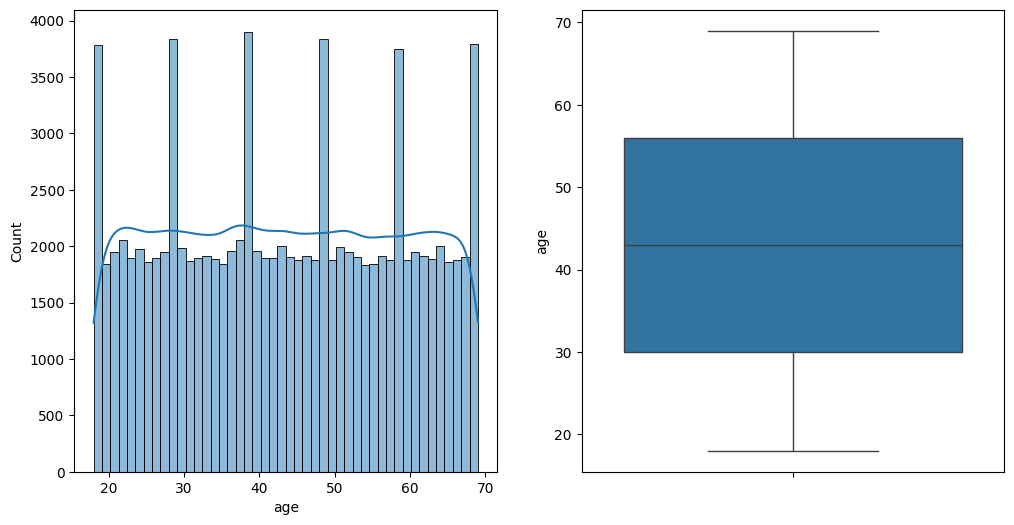

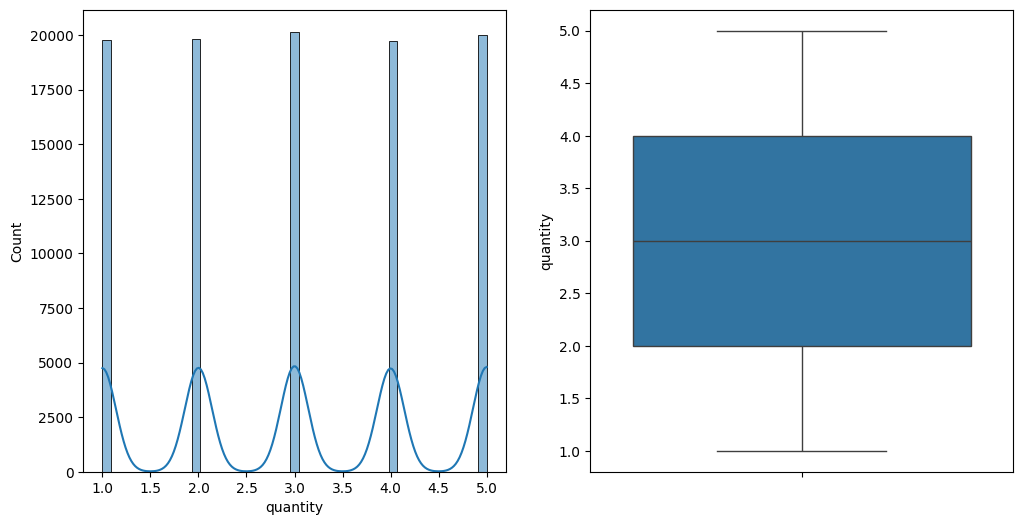

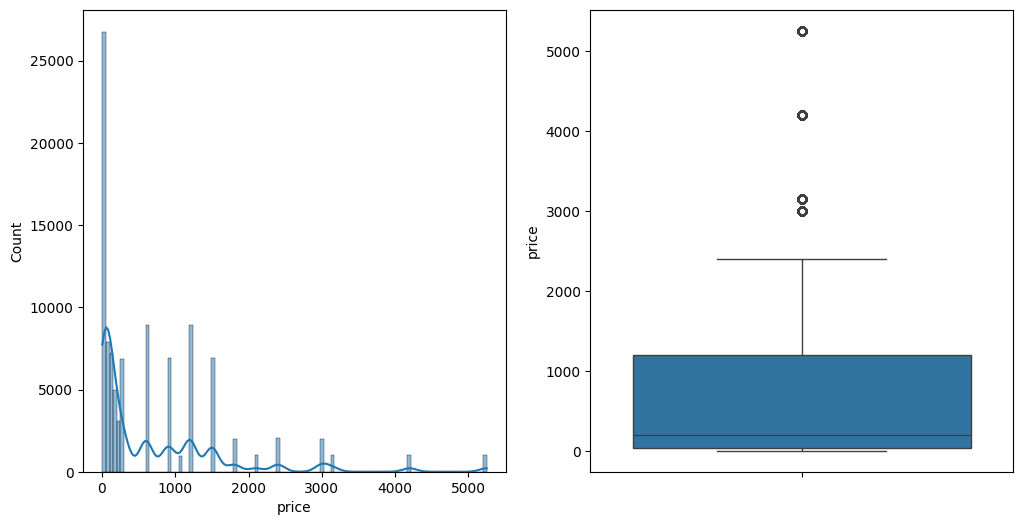

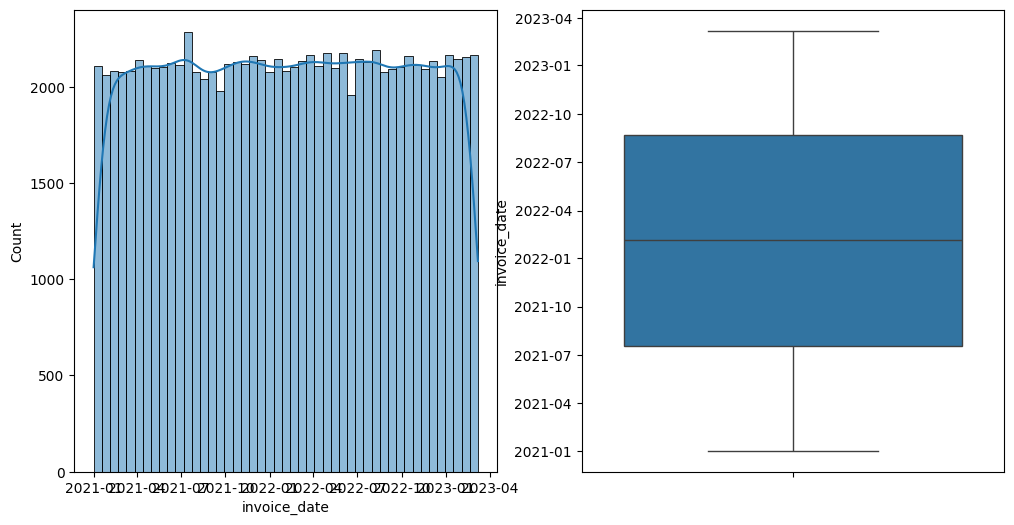

In [141]:
data=df.select_dtypes(exclude="object")
for i in data.columns:
  plt.figure(figsize=(12,6))
  plt.subplot(121)
  sns.histplot(data[i],kde=True)
  plt.subplot(122)
  sns.boxplot(data[i])

In [142]:
# We can see outliers are present in price column
# outlier checking in price column
mean=df['price'].mean()
std=df['price'].std()
outlier_pos = mean + 3*std 
outlier_neg = mean - 3*std 
print(f'Positive outlier value is {outlier_pos}',f"Negative outlier value is{outlier_neg}")

print("We can observe here that total outliers present in price column is :",round(df.loc[~((df.price>=outlier_neg) & (df.price<=outlier_pos)),].shape[0]/len(df)*100,2),"%")
#we can observe here that around 2% outliers are there , not removing the same as we don't have enough data 

Positive outlier value is 3512.810022569011 Negative outlier value is-2134.297380723792
We can observe here that total outliers present in price column is : 2.01 %


In [143]:
#Outliers data 
df.loc[~((df.price>=outlier_neg) & (df.price<=outlier_pos)),]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
23,I252275,C313348,Male,44,Technology,5,5250.0,Cash,2021-10-26,Kanyon
53,I160777,C626042,Female,43,Technology,4,4200.0,Cash,2022-02-22,Metrocity
69,I883721,C236859,Female,44,Technology,5,5250.0,Credit Card,2021-11-19,Mall of Istanbul
363,I194017,C462011,Female,67,Technology,5,5250.0,Cash,2022-01-03,Kanyon
391,I252528,C333065,Male,47,Technology,5,5250.0,Debit Card,2022-10-04,Cevahir AVM
...,...,...,...,...,...,...,...,...,...,...
99204,I264904,C285285,Female,21,Technology,4,4200.0,Credit Card,2021-12-06,Forum Istanbul
99224,I378781,C324387,Female,27,Technology,5,5250.0,Credit Card,2022-03-10,Mall of Istanbul
99234,I316025,C288067,Female,21,Technology,4,4200.0,Cash,2021-06-23,Mall of Istanbul
99242,I115261,C544895,Female,40,Technology,4,4200.0,Cash,2022-07-10,Istinye Park


In [144]:
# Retriving year and month from the invoice_Date column 
df['Month']=df['invoice_date'].dt.month
df['Year']=df['invoice_date'].dt.year
df['Day']=df['invoice_date'].dt.day
df['Quarter']=df['invoice_date'].dt.quarter

In [145]:
#As per the price per quantitiy given , we can calculate the total revenue generated in Turkish liras (TL)

df['Total Revenue']= df['quantity'] * df['price']

df.head(1)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Month,Year,Day,Quarter,Total Revenue
0,I138884,C241288,Female,28,Clothing,5,1500.4,Credit Card,2022-08-05,Kanyon,8,2022,5,3,7502.0


<Axes: xlabel='Month', ylabel='Total Revenue'>

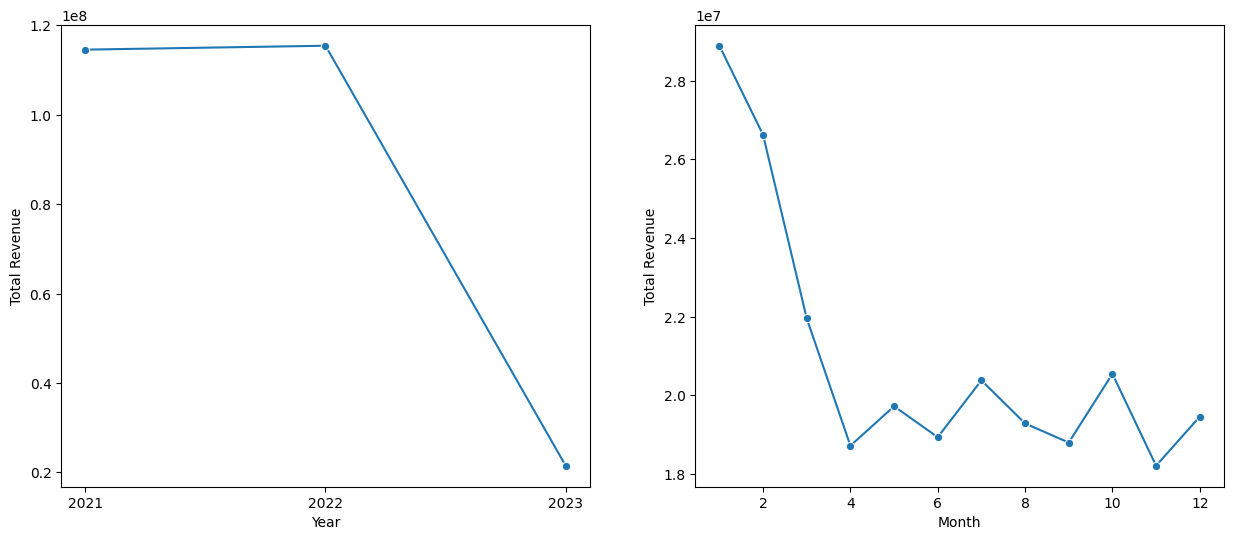

In [190]:
#Monthly and yearly trend
yearly_trend=df.groupby(['Year'])["Total Revenue"].sum().reset_index()
Monnthly_Trend =df.groupby(['Month'])["Total Revenue"].sum().reset_index()

fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.lineplot(x='Year', y='Total Revenue', data=yearly_trend, marker='o',ax=axes[0])
axes[0].set_xticks(yearly_trend['Year'].astype(int))

# Monthly ploat
sns.lineplot(x='Month', y='Total Revenue', data=Monnthly_Trend, marker='o',ax=axes[1])


#we can observe here that there was slight growth in reveune from 2021 -2022 and post that revenue declined drastically till 2023
#While looking at the monthly trend we can see that till april revenue trend is declined and post that ther is zig zag pattern 

([<matplotlib.axis.XTick at 0x22c14d51190>,
 [Text(2021, 0, '2021'), Text(2022, 0, '2022'), Text(2023, 0, '2023')])

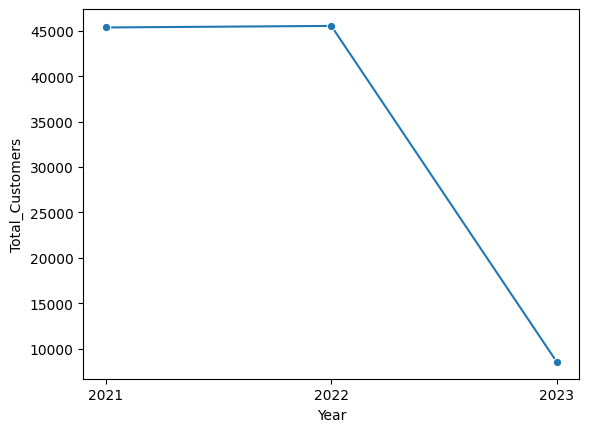

In [232]:
#Lets find out the reason of drastic decline in revenue from 2022-2023 
Total_customer_Trend=df.groupby(["Year"])["invoice_no"].count().reset_index().rename(columns={"invoice_no": "Total_Customers"})
sns.lineplot(x='Year', y='Total_Customers', data=Total_customer_Trend, marker='o')
plt.xticks(yearly_trend['Year'].astype(int))

#we can observe in the below chart that customer count drastically declined from 2022-2023 which is also the reason for revenue decline in this period

<Axes: xlabel='gender', ylabel='count'>

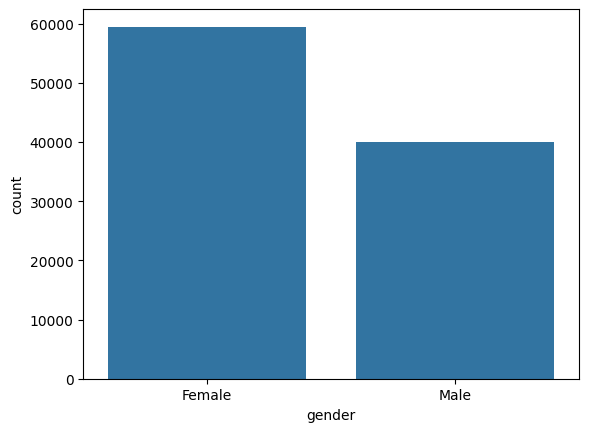

In [209]:
#Customer and Product Analysis
# we can observe that majority cosnumers are female 

sns.countplot(x=df['gender'])

In [219]:
#Lets check the consumers based on age group
# function to categories the ages mainly into 3
def categorize_age_group(age):
    if 18 <= age <= 34:
        return 'Youngsters'
    elif 35 <= age <= 54:
        return 'Middle-Aged'
    else:
        return 'Senior Citizens'

df["Age_Group"]=df["age"].apply(categorize_age_group)

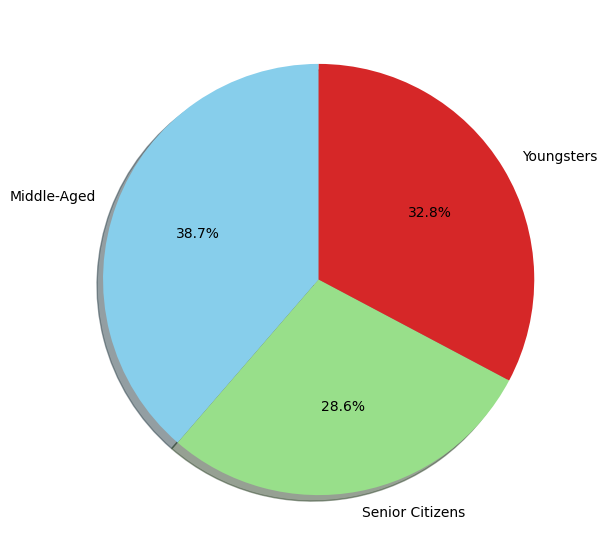

In [250]:
# Proportion of customers based on age Group
pie=df.groupby(["Age_Group"])["gender"].count().reset_index()
x=pie["gender"]
y=pie["Age_Group"]
plt.figure(figsize=(15, 7))
a,b,c=plt.pie(x, labels=y, autopct='%1.1f%%',startangle=90,colors=['skyblue',"#98df8a","#d62728"],shadow=True)

# we can see that middle aged are majorly in number 

<Axes: xlabel='Age_Group', ylabel='count'>

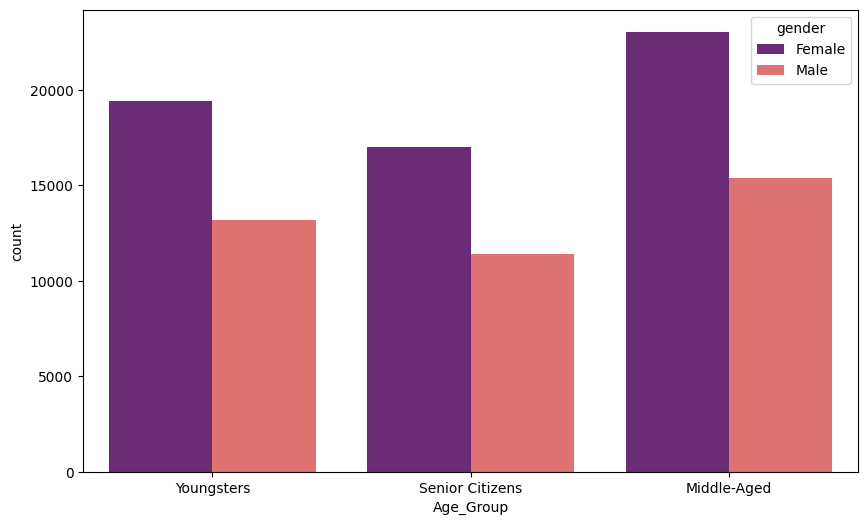

In [237]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Age_Group',palette='magma',hue='gender')


#we can observe here that majorly middle aged consumers that too female are more in coount 

<Axes: xlabel='count', ylabel='category'>

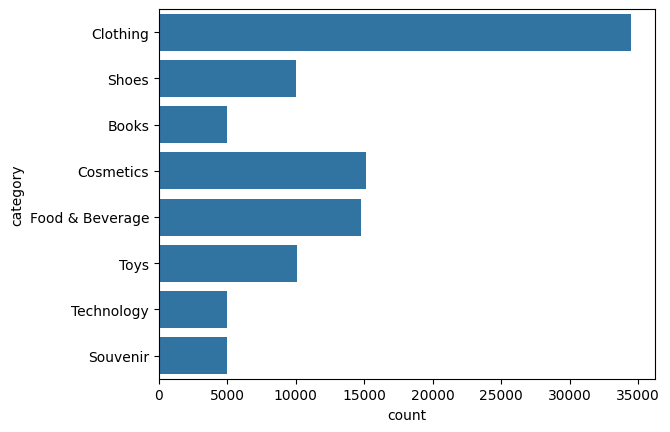

In [238]:
# Productwise
sns.countplot(df['category'])

#we can observe here that clothing the most popular category and second is Cosmetics and third is food and beverage 



<Axes: xlabel='category', ylabel='count'>

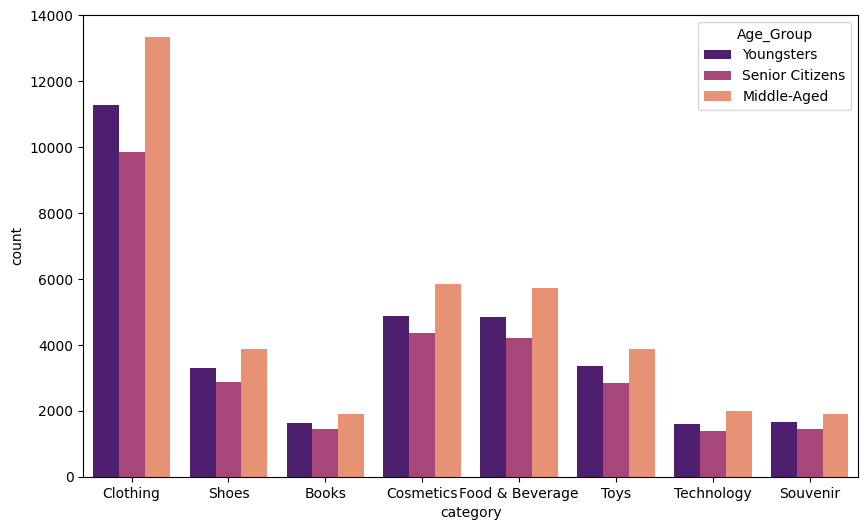

In [241]:
# lets check the purchase behaviour based on age group

plt.figure(figsize=(10,6))

sns.countplot(data=df,x='category',palette='magma',hue='Age_Group')

# we can observe here that based on age group midle aged youngseter and senior citizens are majorly buiyingclothes and middle aged consumer is leading all product category
